## Overview  

The below is a code-along demonstration of how to build a classification model using Keras/TensorFlow 2.0 from an [Udemy Machine Learning course](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/). This is inteded to be reference for how to construct/implement a neural network for classification.

This also inclues examples and explanation of using call backs for **Early Stopping**, and **Drop-out Layers**.

## Problem Statement
Using the Scikit-Learn built in breast cancer dataset ([UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))), create a classification neural network to determine wheather test cases are Malignant or Benign.

## Table of Contents

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Exploratory Data Analysis](#EDA)
* [Splitting the data into training and testing sets](#split_data) 
* [Normalize & Standardize Data](#stand)
* [Construct Network with Layers](#construct)
    * [Optimizer](#parameters)
    * [Loss Function](#parameters)
* [Fit the model to the Training Data](#fit)
* [View Loss Performance over fitting iterations](#loss_over_fit)
* [Early Stopping](#early_stopping)
* [Dropout Layers](#dropout)
* [Get Predictions & Model Evaluation](#predict)

<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a class="anchor" id="import_data"></a>
## Import Data

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head().transpose()

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

<a class="anchor" id="EDA"></a>
## Exploratory Data Analysis

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

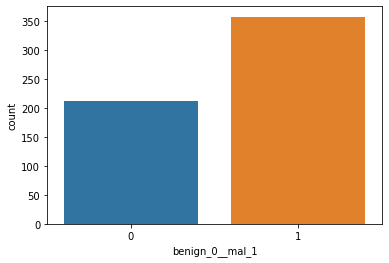

In [6]:
#Count plot of Target, see how balanced the target variables are
sns.countplot(x='benign_0__mal_1',data=df)

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

CORRELATION BETWEEN TARGET VARIABLE AND FEATURES

In [12]:
#correlation b/w feature variables and target
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

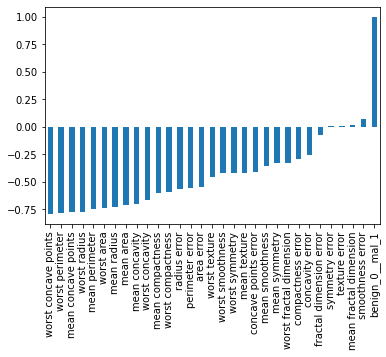

In [13]:
#plot correlation b/w feature variables and target
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

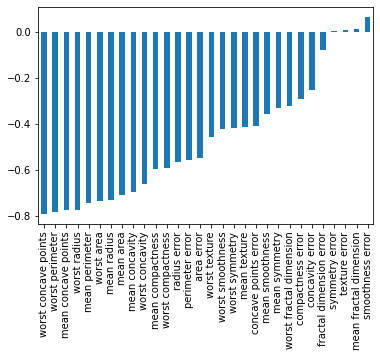

In [15]:
#plot correlation b/w feature variables and target, all except target variable (drop by slicing df [:-1])
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

CORRELATION BETWEEN TARGET VARIABLES

<AxesSubplot:>

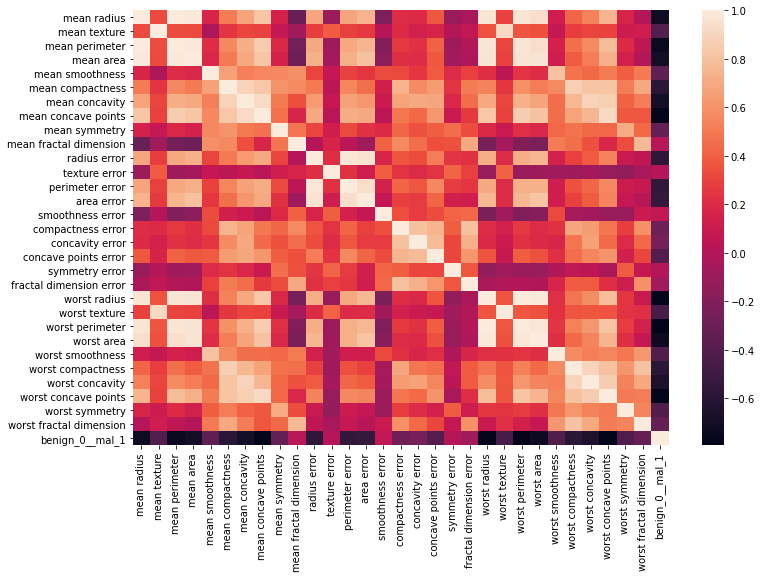

In [17]:
#correlation b/w all variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

<a class="anchor" id="stand"></a>
## Normalize & Standardize Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

**FIT** (on training data) **& TRANSFORM IN 1 STEP**

In [23]:
X_train= scaler.fit_transform(X_train)

**TRANSFORM TEST DATA**

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_train.shape

(426, 30)

In [26]:
X_test.shape

(143, 30)

<a class="anchor" id="construct"></a>
## Construct Network with Layers

    # For a binary classification problem
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


SET # OF NEURONS EQUAL TO NUMBER OF FEATURES IN TRAINING DATA

In [27]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#For BINARY CLASSIFICATION we want the activiation on the output layer to = SIGMOID
model.add(Dense(1,activation='sigmoid')) 


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<a class="anchor" id="parameters"></a>
## Choosing an optimizer and loss for .compile()

Keep in mind what kind of problem you are trying to solve:

compile arguments:  
optimizer = how do you want to optimize this gradient descent? Ex/ Adam optimizer, etc.  
loss = loss function to use
    
    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

<a class="anchor" id="fit"></a>
## Fit the model to the Training Data

If specifying a 'validation_data' parameter when fitting, the model will check the error (against the specifyed validation_data) after each Epoch;

In [33]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          epochs=600)

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6649 - accuracy: 0.5974 - val_loss: 0.6183 - val_accuracy: 0.8322
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.8556 - val_loss: 0.5607 - val_accuracy: 0.9021
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.8954 - val_loss: 0.4982 - val_accuracy: 0.9021
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.9029 - val_loss: 0.4448 - val_accuracy: 0.9161
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8934 - val_loss: 0.3949 - val_accuracy: 0.9231
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8853 - val_loss: 0.3523 - val_accuracy: 0.9231
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.9125 - val_loss: 0.3156 - val_accuracy: 0.9231
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9866 - val_loss: 0.1101 - val_accuracy: 0.9720
Epoch 60/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9865 - val_loss: 0.1142 - val_accuracy: 0.9650
Epoch 61/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9781 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 62/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9797 - val_loss: 0.1117 - val_accuracy: 0.9650
Epoch 63/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.1086 - val_accuracy: 0.9720
Epoch 64/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9731 - val_loss: 0.1128 - val_accuracy: 0.9650
Epoch 65/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.1090 - val_accuracy: 0.9720
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9777 - val_loss: 0.1266 - val_accuracy: 0.9720
Epoch 117/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9831 - val_loss: 0.1228 - val_accuracy: 0.9790
Epoch 118/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9838 - val_loss: 0.1482 - val_accuracy: 0.9580
Epoch 119/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9736 - val_loss: 0.1203 - val_accuracy: 0.9720
Epoch 120/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9757 - val_loss: 0.1255 - val_accuracy: 0.9720
Epoch 121/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.1309 - val_accuracy: 0.9650
Epoch 122/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9782 - val_loss: 0.1239 - val_accuracy: 0.9720
Epoch 123/600

14/14 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.1395 - val_accuracy: 0.9720
Epoch 174/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9751 - val_loss: 0.1491 - val_accuracy: 0.9650
Epoch 175/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.1458 - val_accuracy: 0.9720
Epoch 176/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9853 - val_loss: 0.1500 - val_accuracy: 0.9650
Epoch 177/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9930 - val_loss: 0.1505 - val_accuracy: 0.9650
Epoch 178/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9849 - val_loss: 0.1479 - val_accuracy: 0.9650
Epoch 179/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9841 - val_loss: 0.1430 - val_accuracy: 0.9720
Epoch 180/600

14/14 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9817 - val_loss: 0.1581 - val_accuracy: 0.9510
Epoch 231/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 0.1598 - val_accuracy: 0.9510
Epoch 232/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9851 - val_loss: 0.1486 - val_accuracy: 0.9650
Epoch 233/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9811 - val_loss: 0.1648 - val_accuracy: 0.9580
Epoch 234/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9861 - val_loss: 0.1501 - val_accuracy: 0.9650
Epoch 235/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9798 - val_loss: 0.1614 - val_accuracy: 0.9510
Epoch 236/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9864 - val_loss: 0.1519 - val_accuracy: 0.9580
Epoch 237/600

14/14 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9757 - val_loss: 0.1655 - val_accuracy: 0.9510
Epoch 288/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9805 - val_loss: 0.1684 - val_accuracy: 0.9510
Epoch 289/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9901 - val_loss: 0.1912 - val_accuracy: 0.9371
Epoch 290/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9943 - val_loss: 0.1578 - val_accuracy: 0.9720
Epoch 291/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9833 - val_loss: 0.1777 - val_accuracy: 0.9441
Epoch 292/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9865 - val_loss: 0.1607 - val_accuracy: 0.9650
Epoch 293/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9845 - val_loss: 0.1813 - val_accuracy: 0.9371
Epoch 294/600

14/14 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9923 - val_loss: 0.1756 - val_accuracy: 0.9510
Epoch 345/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9873 - val_loss: 0.1801 - val_accuracy: 0.9510
Epoch 346/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9874 - val_loss: 0.1826 - val_accuracy: 0.9441
Epoch 347/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9913 - val_loss: 0.1815 - val_accuracy: 0.9510
Epoch 348/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.2027 - val_accuracy: 0.9301
Epoch 349/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.1869 - val_accuracy: 0.9441
Epoch 350/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9864 - val_loss: 0.1770 - val_accuracy: 0.9510
Epoch 351/600

14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9962 - val_loss: 0.1918 - val_accuracy: 0.9510
Epoch 402/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9842 - val_loss: 0.2423 - val_accuracy: 0.9231
Epoch 403/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9881 - val_loss: 0.2046 - val_accuracy: 0.9441
Epoch 404/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9941 - val_loss: 0.2064 - val_accuracy: 0.9441
Epoch 405/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9844 - val_loss: 0.2234 - val_accuracy: 0.9301
Epoch 406/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9895 - val_loss: 0.2141 - val_accuracy: 0.9371
Epoch 407/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9959 - val_loss: 0.2019 - val_accuracy: 0.9510
Epoch 408/600

14/14 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9920 - val_loss: 0.2379 - val_accuracy: 0.9371
Epoch 459/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9987 - val_loss: 0.2404 - val_accuracy: 0.9371
Epoch 460/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9950 - val_loss: 0.2245 - val_accuracy: 0.9441
Epoch 461/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9909 - val_loss: 0.2576 - val_accuracy: 0.9231
Epoch 462/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9961 - val_loss: 0.2406 - val_accuracy: 0.9371
Epoch 463/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9931 - val_loss: 0.2366 - val_accuracy: 0.9371
Epoch 464/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9898 - val_loss: 0.2431 - val_accuracy: 0.9371
Epoch 465/600

14/14 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9992 - val_loss: 0.2453 - val_accuracy: 0.9441
Epoch 516/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.3064 - val_accuracy: 0.9231
Epoch 517/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9987 - val_loss: 0.2425 - val_accuracy: 0.9441
Epoch 518/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.9992 - val_loss: 0.2533 - val_accuracy: 0.9441
Epoch 519/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9911 - val_loss: 0.2856 - val_accuracy: 0.9301
Epoch 520/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9962 - val_loss: 0.2465 - val_accuracy: 0.9441
Epoch 521/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 0.9941 - val_loss: 0.2531 - val_accuracy: 0.9441
Epoch 522/600

14/14 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.3083 - val_accuracy: 0.9301
Epoch 573/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.2630 - val_accuracy: 0.9441
Epoch 574/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.3129 - val_accuracy: 0.9301
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.2850 - val_accuracy: 0.9371
Epoch 576/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.3201 - val_accuracy: 0.9301
Epoch 577/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.2860 - val_accuracy: 0.9371
Epoch 578/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2969 - val_accuracy: 0.9301
Epoch 579/600

<a class="anchor" id="loss_over_fit"></a>
## View Loss Performance over fitting iterations

**CREATE DATAFRAME OF MODELS' LOSS HISTORY**

In [34]:
losses = pd.DataFrame(model.history.history)

**loss** IS THE LOSS OF THE TRAINING DATA **val_loss** IS THE LOSS ON THE VALIDATION DATA PROVIDED AS 'validation_data' DURING FITTING

In [35]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.650915,0.694836,0.618345,0.832168
1,0.594027,0.873239,0.560691,0.902098
2,0.534851,0.901408,0.498201,0.902098
3,0.479821,0.899061,0.444767,0.916084
4,0.428203,0.901408,0.394946,0.923077


PLOTTING (LOSS ON TRAINING DATA) VS. (LOSS ON TEST DATA) CAN BE A **CHECK FOR OVERFITTING**

ex/ Overfitting would be indicated by an increase in the loss on validation data *while* also experiencing a decrease in the loss on training data

If at any point this divergence is observed, consider stopping the model early

<AxesSubplot:>

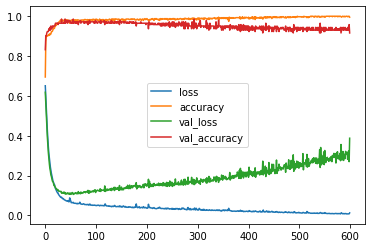

In [36]:
losses.plot()

Based on the plot of training vs. validation losses above (loss v. val_loss), we have a clear indication of overfitting as we continue training over too many epochs

<a class="anchor" id="early_stopping"></a>
## Early Stopping

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

With Early Stopping we choose a metric to monitor model performance, to identify an optimal stopping point. Available parameters include:
  
Args:  
  * monitor: Quantity to be monitored.  
  * min_delta: Minimum change in the monitored quantity to qualify as an improvement
  * patience: Number of epochs with no improvement after which training will be stopped.  
  * verbose: verbosity mode.  
  * mode: One of `{"auto", "min", "max"}`
  * baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.  
  * restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity.  

In [39]:
#help(EarlyStopping)

Define new model (otherwise we'd be training the old model)

In [40]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#For BINARY CLASSIFICATION we want the activiation on the output layer to = SIGMOID
model.add(Dense(1,activation='sigmoid')) 


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Create an EarlyStopping callback to use when fitting the model

In [42]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min',verbose =1,patience = 25)

Specify **callbacks** when fitting model

In [45]:
#The model will attempt to fit using all the parameters provided, but will be constrained to the criteria specified in the callbacks

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          epochs=600,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6871 - accuracy: 0.6380 - val_loss: 0.6695 - val_accuracy: 0.6154
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6163 - val_loss: 0.6473 - val_accuracy: 0.6154
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6195 - val_loss: 0.6232 - val_accuracy: 0.6154
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6476 - val_loss: 0.5958 - val_accuracy: 0.6783
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7079 - val_loss: 0.5652 - val_accuracy: 0.7902
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7510 - val_loss: 0.5323 - val_accuracy: 0.8112
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.8392 - val_loss: 0.5045 - val_accuracy: 0.8531
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9788 - val_loss: 0.1206 - val_accuracy: 0.9580
Epoch 60/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9751 - val_loss: 0.1181 - val_accuracy: 0.9650
Epoch 61/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9792 - val_loss: 0.1187 - val_accuracy: 0.9650
Epoch 62/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9844 - val_loss: 0.1202 - val_accuracy: 0.9580
Epoch 63/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9843 - val_loss: 0.1202 - val_accuracy: 0.9580
Epoch 64/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9784 - val_loss: 0.1179 - val_accuracy: 0.9720
Epoch 65/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9906 - val_loss: 0.1185 - val_accuracy: 0.9720
Epoch 

<AxesSubplot:>

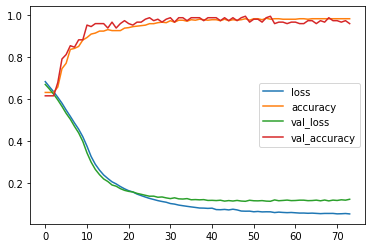

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

The above model_loss.plot show an improvement over the original loss.plot (where all 600 epochs were trained). We want to stop fitting before val_loss starts to increase (decreasing & flat val_loss are okay).

<a class="anchor" id="dropout"></a>
## Dropout Layers
Dropout Layers will turn off a percentage of neurons randomly

In [47]:
from tensorflow.keras.layers import Dropout

Define new model (otherwise we'd be training the old model)

In [48]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5)) #rate = proportion of neurons to take and turn off; Float between 0 and 1. Fraction of the input units to drop. (common rates are b/w 0.2 &  0.5)

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))

#For BINARY CLASSIFICATION we want the activiation on the output layer to = SIGMOID
model.add(Dense(1,activation='sigmoid')) 


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])#rate = proportion of neurons to take and turn off; Float between 0 and 1. Fraction of the input units to drop. (common rates are b/w 0.2 &  0.5)

We can use the same 'fit' as above (with EarlyStopping), the model this time now contains Dropout itself

In [49]:
#The model will attempt to fit using all the parameters provided, but will be constrained to the criteria specified in the callbacks

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          epochs=600,
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7266 - accuracy: 0.5141 - val_loss: 0.6793 - val_accuracy: 0.6643
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.5739 - val_loss: 0.6574 - val_accuracy: 0.8811
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6373 - val_loss: 0.6362 - val_accuracy: 0.8811
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6349 - val_loss: 0.6132 - val_accuracy: 0.8462
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.6419 - val_loss: 0.5924 - val_accuracy: 0.8462
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.6962 - val_loss: 0.5655 - val_accuracy: 0.8531
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.7608 - val_loss: 0.5396 - val_accuracy: 0.8531
Epoch 8/600
1

Epoch 59/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9450 - val_loss: 0.0949 - val_accuracy: 0.9720
Epoch 60/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9536 - val_loss: 0.0904 - val_accuracy: 0.9720
Epoch 61/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1213 - accuracy: 0.9474 - val_loss: 0.0904 - val_accuracy: 0.9720
Epoch 62/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9546 - val_loss: 0.1033 - val_accuracy: 0.9510
Epoch 63/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9531 - val_loss: 0.0923 - val_accuracy: 0.9720
Epoch 64/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9481 - val_loss: 0.0937 - val_accuracy: 0.9720
Epoch 65/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.9464 - val_loss: 0.0870 - val_accuracy: 0.9860
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9586 - val_loss: 0.0984 - val_accuracy: 0.9720
Epoch 117/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9828 - val_loss: 0.0805 - val_accuracy: 0.9790
Epoch 118/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9702 - val_loss: 0.0859 - val_accuracy: 0.9790
Epoch 119/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9877 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 120/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9898 - val_loss: 0.0989 - val_accuracy: 0.9720
Epoch 00120: early stopping


<AxesSubplot:>

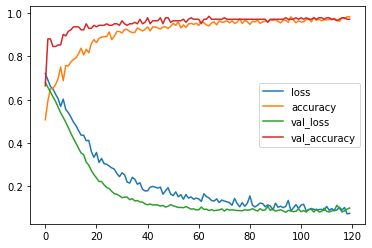

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

By using Dropout & EarlyStopping together, Loss & Val_loss appear to flatten out together

<a class="anchor" id="predict"></a>
## Get Predictions & Model Evaluation


In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
predictions = model.predict_classes(X_test)

C:\Users\devin\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [54]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [55]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
